# Group Assignment: Titanic EDA
Name: 

In this assignment, you will work in groups to explore the Titanic dataset. Follow the questions below and work together to answer each of them using `pandas`, `matplotlib`, and `seaborn` libraries. Each group is responsible for preparing a presentation summarizing the findings and visualizations.


### Titanic Dataset
https://www.kaggle.com/datasets/yasserh/titanic-dataset

## The Titanic dataset is one of the most well-known datasets for data analysis and machine learning. It provides detailed information about the passengers aboard the Titanic ship, which tragically sank during its maiden voyage in 1912. The dataset is often used to understand how different features such as gender, age, passenger class, and fare influenced a passenger's likelihood of survival. The key features in the dataset include:
### Q0. Get the informations from Kaggle
- PassengerId: Passenger ID
- Survived: Weather Survived or not: 0 = No, 1 = Yes
- Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Name of the Passenger
- Sex: Gender
- Age: Age in Years
- SibSp: No. of siblings / spouses aboard the Titanic
- Parch: No. of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

### Import Libraries and Load the Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Titanic-Dataset.csv")
titanic_data=data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q1: What are the columns present in the dataset?

Hint: Use a pandas function to list the columns.

In [2]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Q2: What is the structure of the dataset, and what are the datatypes of the columns?
Hint: Use the .info() method in pandas.

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q3: Provide a summary of the numerical data.
Hint: Use the .describe() function.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q4: Drop PassengerId, Name, Ticket, Cabin, Embarked. Why are we dropping the columns?
Hint: Use .drop() and axis=1

In [5]:
data = data.drop("Name", axis=1)
data = data.drop("Ticket", axis=1)
data = data.drop("Cabin", axis=1)
data = data.drop("Embarked", axis=1)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


### Q5: Which columns have missing values, and how many?
Hint: Use .isnull().sum().

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

### Q6: How can you handle missing values in the 'Age' column?
Hint: Fill missing values with either the mean, median, or mode.

In [7]:
imputation_data={
    "Age" : data['Age'].mean()
}

In [8]:
new_data=data.fillna(value=imputation_data)
new_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

### Q7: What is the survival rate of passengers by gender?
Hint: Use groupby() on the "Sex" column and calculate the mean of the "Survived" column.

In [9]:
gender_survived=new_data.groupby('Sex')['Survived'].mean()
gender_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Q8: Create a bar plot of the survival rate by gender.
Hint: Use seaborn.barplot().

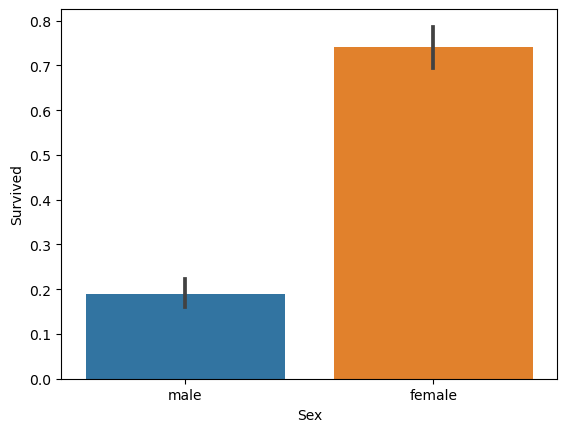

In [10]:
sns.barplot(x='Sex',y='Survived', data=titanic_data)
plt.show()

Text(0.5, 1.0, 'Fare Distribution')

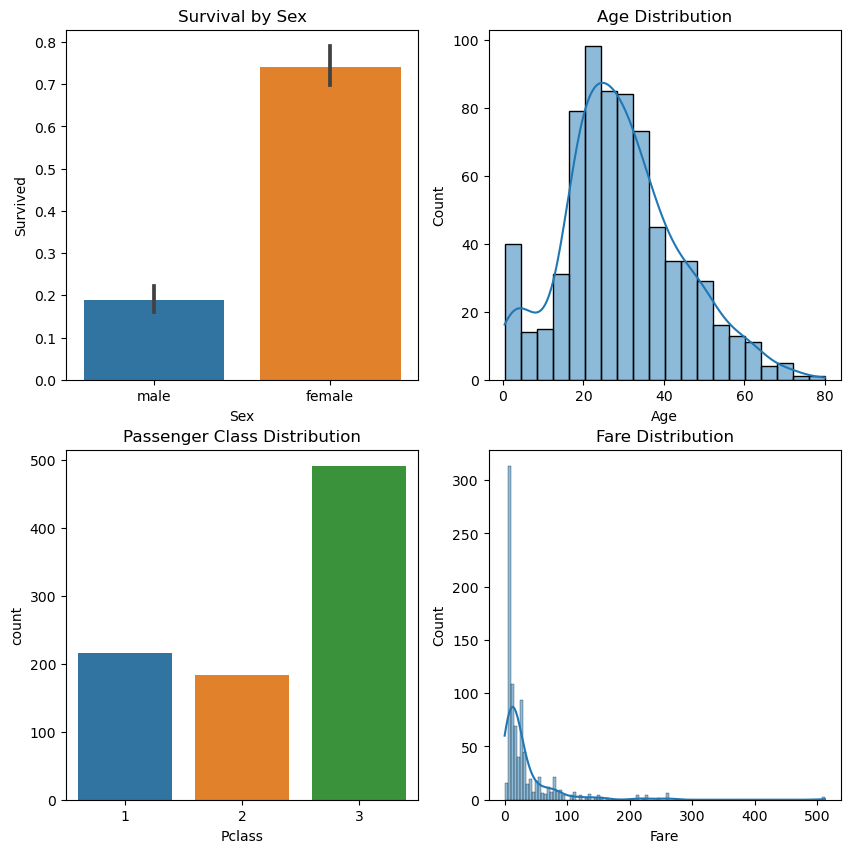

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# First plot - Bar plot for 'sex' column

sns.barplot(x='Sex', y='Survived', data=titanic_data, ax=axes[0, 0])

axes[0, 0].set_title('Survival by Sex')



# Second plot - Histogram for 'age' column

sns.histplot(titanic_data['Age'], kde=True, ax=axes[0, 1])

axes[0, 1].set_title('Age Distribution')



# Third plot - Count plot for 'class' column

sns.countplot(x='Pclass', data=titanic_data, ax=axes[1, 0])

axes[1, 0].set_title('Passenger Class Distribution')



# Fourth plot - Histogram for 'fare' column

sns.histplot(titanic_data['Fare'], kde=True, ax=axes[1, 1])

axes[1, 1].set_title('Fare Distribution')

### Q9: How many passengers were in each class (Pclass)?
Hint: Use .value_counts() on the "Pclass" column.

In [12]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Q10: What is the survival rate for each passenger class?
Hint: Group by "Pclass" and calculate the mean of "Survived".

In [13]:
pclass_survival_rate=new_data.groupby("Pclass")["Survived"].mean()
pclass_survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Q11: Create a bar plot of survival rates by passenger class.
Hint: Use seaborn.barplot().

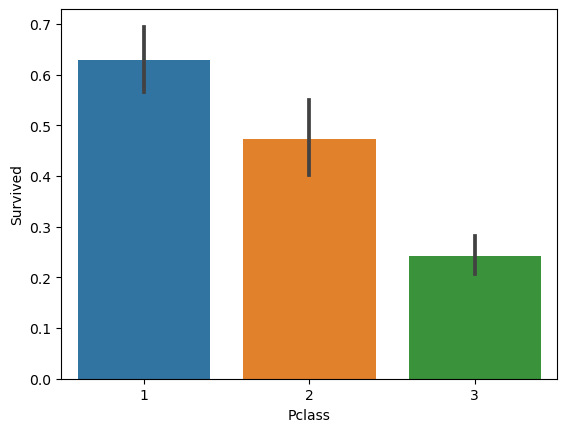

In [14]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.show()

### Q12: Plot the distribution of the 'Age' column.
Hint: Use seaborn.histplot() to plot a histogram.

<function matplotlib.pyplot.show(close=None, block=None)>

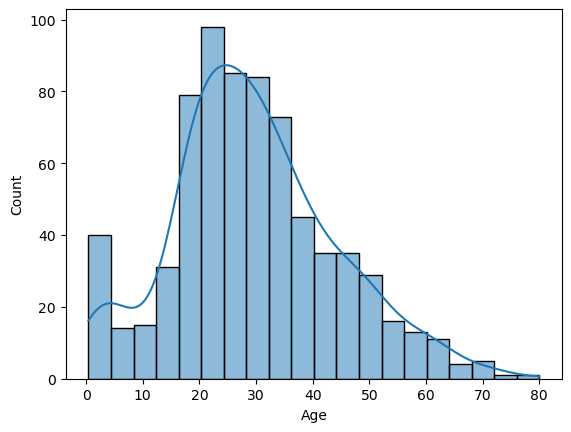

In [15]:
sns.histplot(titanic_data['Age'], kde=True)
plt.show

### Q13: Create a box plot comparing survival by age.
Hint: Use seaborn.boxplot() to compare the distribution of age for survivors and non-survivors.

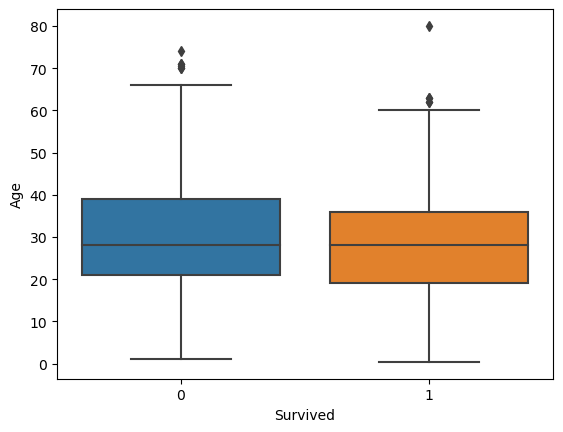

In [16]:
sns.boxplot(x=titanic_data['Survived'], y=titanic_data['Age'])
plt.show()

### Q14: Plot the distribution of the 'Fare' column.
Hint: Use seaborn.histplot().

<Axes: xlabel='Fare', ylabel='Count'>

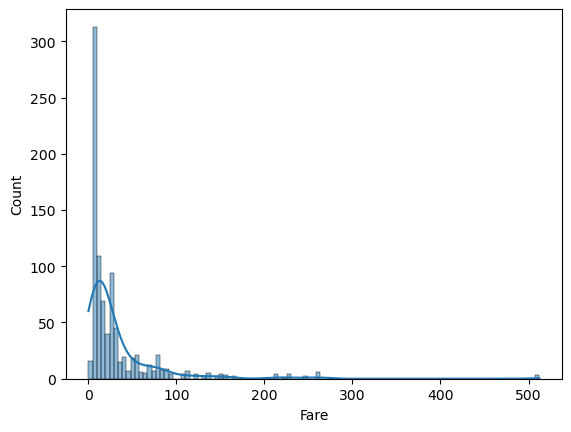

In [17]:
sns.histplot(titanic_data['Fare'], kde=True)

### Q15: What are the correlations between the numerical columns? Any pattern?
Hint: Use the .select_dtypes('number') and .corr() function and visualize the result with a heatmap.

In [22]:
corr_matrix=titanic_data.select_dtypes('number').corr()
corr_matrix.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651


Text(0.5, 1.0, 'Correlation of Survival, Passenger Class, Age, Siblings and Spouse, Parents and Childern, and Fare Price')

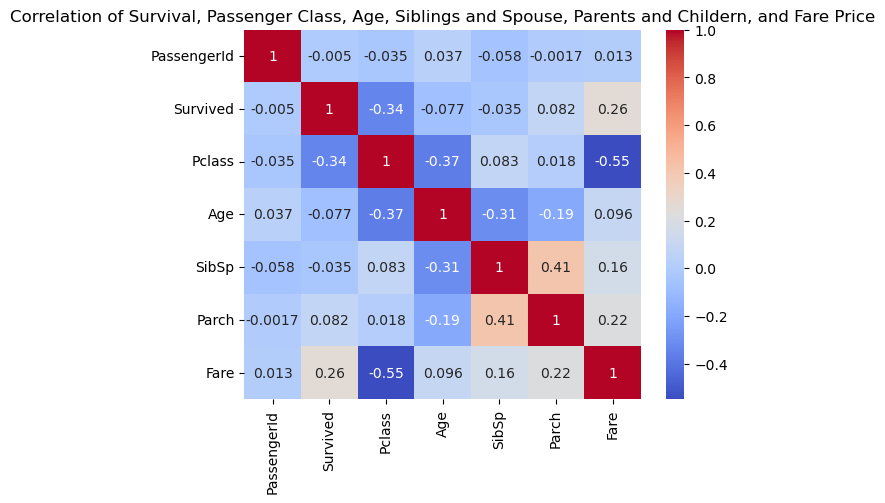

In [30]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title("Correlation of Survival, Passenger Class, Age, Siblings and Spouse, Parents and Childern, and Fare Price")

### Q16: Does having siblings or spouses aboard affect survival chances?
Hint: Group by the "SibSp" and Survived column.

In [25]:
titanic_data.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

No evidence of having siblings or spouses does not affect survival chances.

### Q17: Create a scatter plot showing the relationship between fare and survival.
Hint: Use seaborn.scatterplot().

Text(0.5, 1.0, 'Scatter plot of Fare Price and Survival')

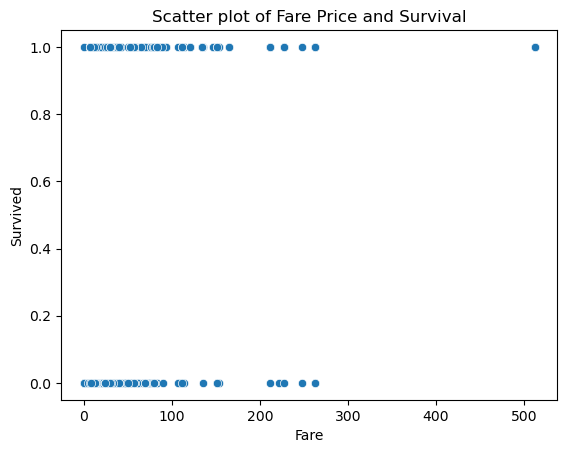

In [31]:
sns.scatterplot(x=titanic_data['Fare'], y=titanic_data['Survived'])
plt.title("Scatter plot of Fare Price and Survival")

### Q18: Create a pie chart showing the distribution of passengers by class (Pclass).

Hint: Use matplotlib.pie() to create the pie chart.

Text(0.5, 1.0, 'Distribution of Passenger Class')

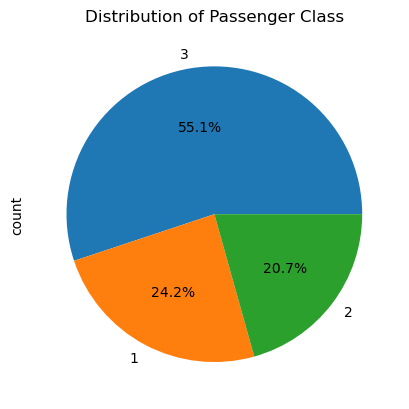

In [27]:
titanic_data['Pclass'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Passenger Class")

### Q19: Plot a line graph showing how the fare varies with the age of the passengers.

Hint: Use seaborn.lineplot() to plot the line graph.

<Axes: xlabel='Age', ylabel='Fare'>

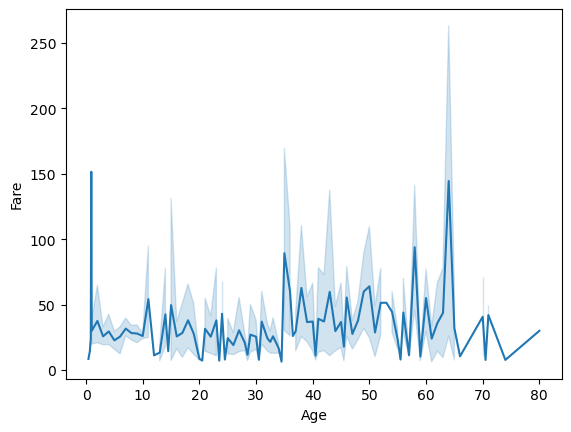

In [28]:
sns.lineplot(y=titanic_data['Fare'], x=titanic_data['Age'])

### Q20. Create a pairplot of the numerical features (Age, Fare, SibSp, Parch) in the dataset to explore the relationships between them.

Hint: Use seaborn.pairplot() to plot pairwise relationships.

C:\Users\garre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


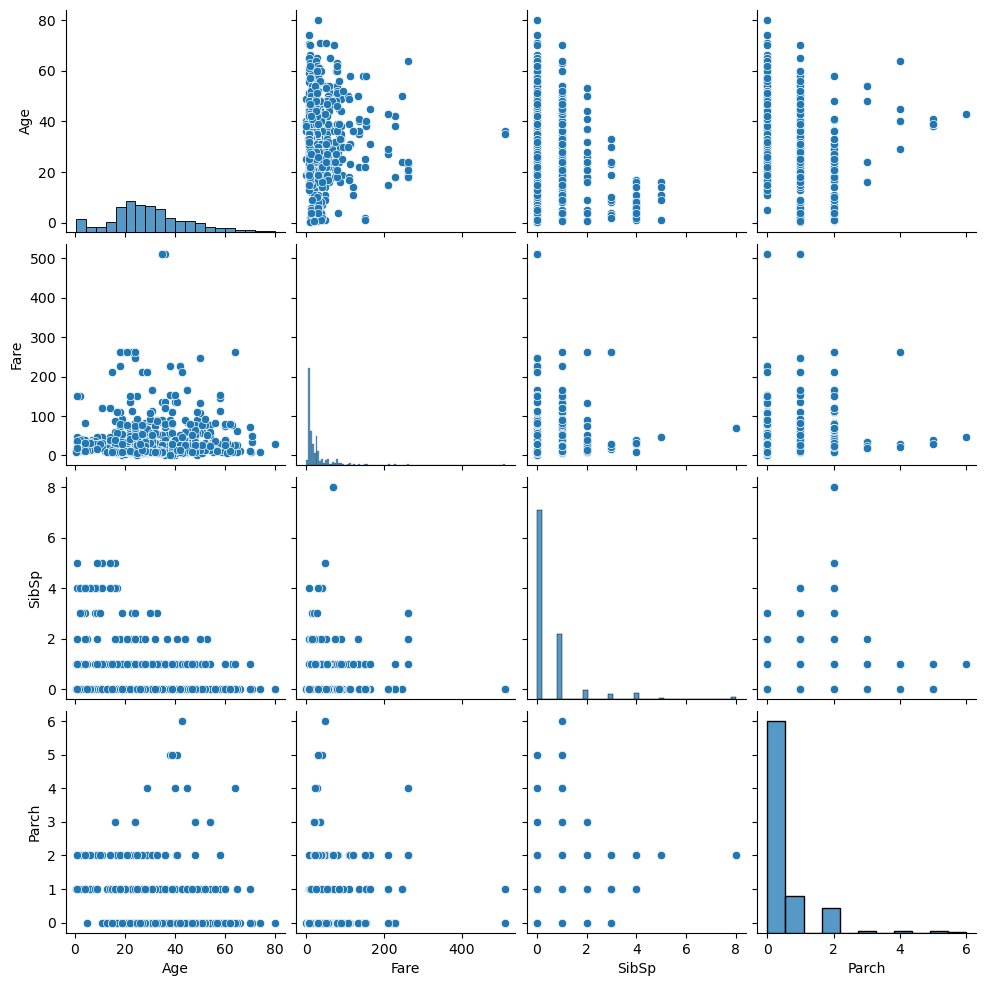

In [29]:
sns.pairplot(titanic_data[['Age', 'Fare', 'SibSp', 'Parch']])

## Summary:  Based on the visualizations you have created so far (bar plots, histograms, scatter plots, etc.), analyze which features (such as 'Pclass', 'Sex', 'Age', and 'Fare') seem to influence the survival of passengers. What patterns can you identify from these visualizations, and which plot provided the clearest insight?

Gender (sex): From the bar plot of survival rates by gender. You can see that the females had a higher chance of survival than the male passengers.

Passenger class: Survival rate by pclass was shown in a bar plot that passengers with Pclass 1 had a higher survial rate than the passengers in pclass 2 and 3.

Age: The box plot showed that the age of the passengers affected their chances of survial.

Fare:The scatter plot of fare vs survival rate showed that anyone who paid a higher fare had a better chance of survival compared to other passengers.